# Neural Gas

In [84]:
#Importación de variables
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [85]:
#PASO 1. CARGAR BASE DE DATOS Y RUTAS
BaseAumentada = pd.read_csv("C:/Users/clau_/OneDrive/Documentos/FCFM/03_Tetramestre/Aprendizaje_Profundo/Clase 04/BaseLD.csv")
BaseAumentada

,SegmentR,PEPR,AgeR,TimeRelationR,IncomeSourceR,ActivityR,NationalityR,CommonAddR,ProductTR,SubproductR,...,SumReR,RSR,AAR,SendingNumR,ReceivingNumR,StateOpeR,StateResR,MunOpeR,MunResR,CountryR
0,80,100,96,100,100,97,96,72,98,77,...,64,66,72,80,78,91,79,97,89,99
1,96,96,97,98,99,96,96,69,97,77,...,83,84,71,81,78,92,81,99,90,100
2,81,98,99,99,99,98,97,68,96,98,...,84,64,89,82,82,90,82,99,92,96
3,96,99,99,100,96,99,99,68,98,99,...,84,84,88,81,80,91,82,96,89,96
4,82,99,98,98,97,100,97,68,100,96,...,66,84,68,80,82,89,82,97,89,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27746,19,12,32,19,27,19,11,11,26,8,...,25,23,29,4,6,19,19,17,4,10
27747,20,9,32,18,25,19,10,10,27,12,...,26,27,12,21,20,18,22,16,5,9
27748,22,10,34,21,26,19,8,10,26,3,...,24,5,28,18,6,29,20,15,7,8
27749,20,12,33,20,24,22,9,11,23,6,...,24,27,12,20,18,28,9,14,5,12


In [86]:
# Inicializamos los centroides
centroides = []
aux = BaseAumentada.apply(lambda x: float(x.min()))
centroides.append(aux)
aux = BaseAumentada.apply(lambda x: float(x.mean()))
centroides.append(aux)
aux = BaseAumentada.apply(lambda x: float(x.max()))
centroides.append(aux)
centroides_df = pd.concat(centroides, axis=1)

In [87]:
#Funciones
def funcion_t(inicial, final, iteracion, max_iteracion):
    if inicial == 0 or max_iteracion == 0:
        return 0
    else:
        return inicial * ((final / inicial) ** (iteracion / max_iteracion))
    
def h_r(r, p_t):
    return np.exp(-(r / p_t))

In [88]:
def graficar_centroides(data, pertenecia, centroides, iteracion):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroides_2d = pca.transform(centroides.T)
    clear_output(wait=True)
    plt.title(f'Iteración {iteracion}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=pertenecia)
    plt.scatter(x=centroides_2d[:,0], y=centroides_2d[:,1])
    plt.show()

In [89]:
#Hiperparámetros
rho_0 = 1.0
rho_f = 0.1
eta_0 = 0.1
eta_f = 0.01
iteraciones = 20
m, n = BaseAumentada.shape

In [93]:
# Seleccionar un punto aleatorio del conjunto de datos
base = BaseAumentada.copy()
BaseAumentada["Pertenencia"] = -1
for iteracion in range(1):
    for i in range(m):
        punto = BaseAumentada.iloc[i, :]

        # Calcular distancias entre el punto y los centroides
        distancias = centroides_df.apply(lambda x: np.sqrt(((punto.to_frame().T - x)**2).sum(axis=1)))
        BaseAumentada.at[i, "Pertenencia"] = distancias.idxmin(axis=1)

        # Actualizar parámetros de acuerdo con las fórmulas proporcionadas
        rho_t = funcion_t(rho_0, rho_f, iteracion, iteraciones)
        eta_t = funcion_t(eta_0, eta_f, iteracion, iteraciones)

        Rs = distancias.rank(axis = 1, method = 'min')

        # Calcular la función de vecindario utilizando los nuevos parámetros
        influencia = h_r(Rs, rho_t)

        # Actualizar posiciones de los centroides        
        for k in range(0, 3):
            cluster = eta_t * influencia[k]*(punto.to_frame().T - centroides_df[k]).T
            centroides_df[k] = centroides_df[k] + cluster.iloc[:, 0]

        print(f'Iteracion {iteracion} Dato {i} completado')
centroides_df.to_csv('clusters.csv', index=False)

Iteracion 0 Dato 0 completado
Iteracion 0 Dato 1 completado
Iteracion 0 Dato 2 completado
Iteracion 0 Dato 3 completado
Iteracion 0 Dato 4 completado
Iteracion 0 Dato 5 completado
Iteracion 0 Dato 6 completado
Iteracion 0 Dato 7 completado
Iteracion 0 Dato 8 completado
Iteracion 0 Dato 9 completado
Iteracion 0 Dato 10 completado
Iteracion 0 Dato 11 completado
Iteracion 0 Dato 12 completado
Iteracion 0 Dato 13 completado
Iteracion 0 Dato 14 completado
Iteracion 0 Dato 15 completado
Iteracion 0 Dato 16 completado
Iteracion 0 Dato 17 completado
Iteracion 0 Dato 18 completado
Iteracion 0 Dato 19 completado
Iteracion 0 Dato 20 completado
Iteracion 0 Dato 21 completado
Iteracion 0 Dato 22 completado
Iteracion 0 Dato 23 completado
Iteracion 0 Dato 24 completado
Iteracion 0 Dato 25 completado
Iteracion 0 Dato 26 completado
Iteracion 0 Dato 27 completado
Iteracion 0 Dato 28 completado
Iteracion 0 Dato 29 completado
Iteracion 0 Dato 30 completado
Iteracion 0 Dato 31 completado
Iteracion 0 Dato 3

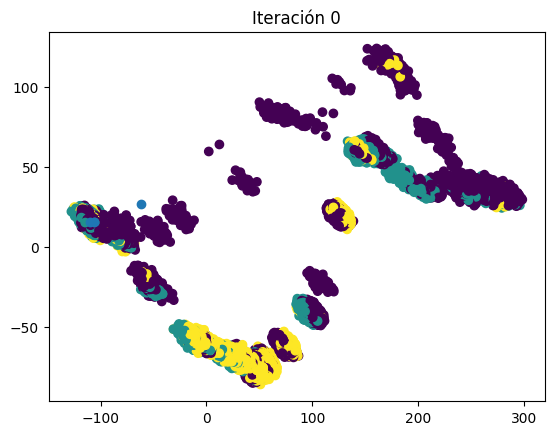

In [94]:
graficar_centroides(BaseAumentada.drop("Pertenencia", axis=1), BaseAumentada["Pertenencia"], centroides_df, iteracion)

In [95]:
centroides_df

,0,1,2
SegmentR,20.297764,22.455475,36.977720
PEPR,10.028808,10.485109,22.035278
AgeR,32.872150,33.557322,45.876509
TimeRelationR,20.060524,20.947835,36.072390
IncomeSourceR,24.984516,26.953537,42.274423
ActivityR,19.801100,20.764331,33.699440
NationalityR,10.090526,10.098166,16.479151
CommonAddR,9.874829,9.869855,9.998278
ProductTR,25.195497,25.188494,26.688683
SubproductR,7.542310,10.733308,28.131049


In [96]:
# Print means
suma_promedio = np.sum(centroides_df, axis=0) / 30
suma_promedio_df = pd.DataFrame({"Neurona": ["Neurona1", "Neurona2", "Neurona3"], "Suma.Promedio": suma_promedio})
suma_promedio_df

,Neurona,Suma.Promedio
0,Neurona1,16.817797
1,Neurona2,17.435500
2,Neurona3,25.061320


In [ ]:
BaseAumentada["Pertenencia"].value_counts()

Pertenencia
2    13967
0    13589
1      195
Name: count, dtype: int64